<a href="https://colab.research.google.com/github/danic95/RabbitMQ_Example/blob/master/Lab01_The_Imitation_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01 (Google Colab) — Introducción a la clase con *The Imitation Game*  
**Maestría | Criptografía**  
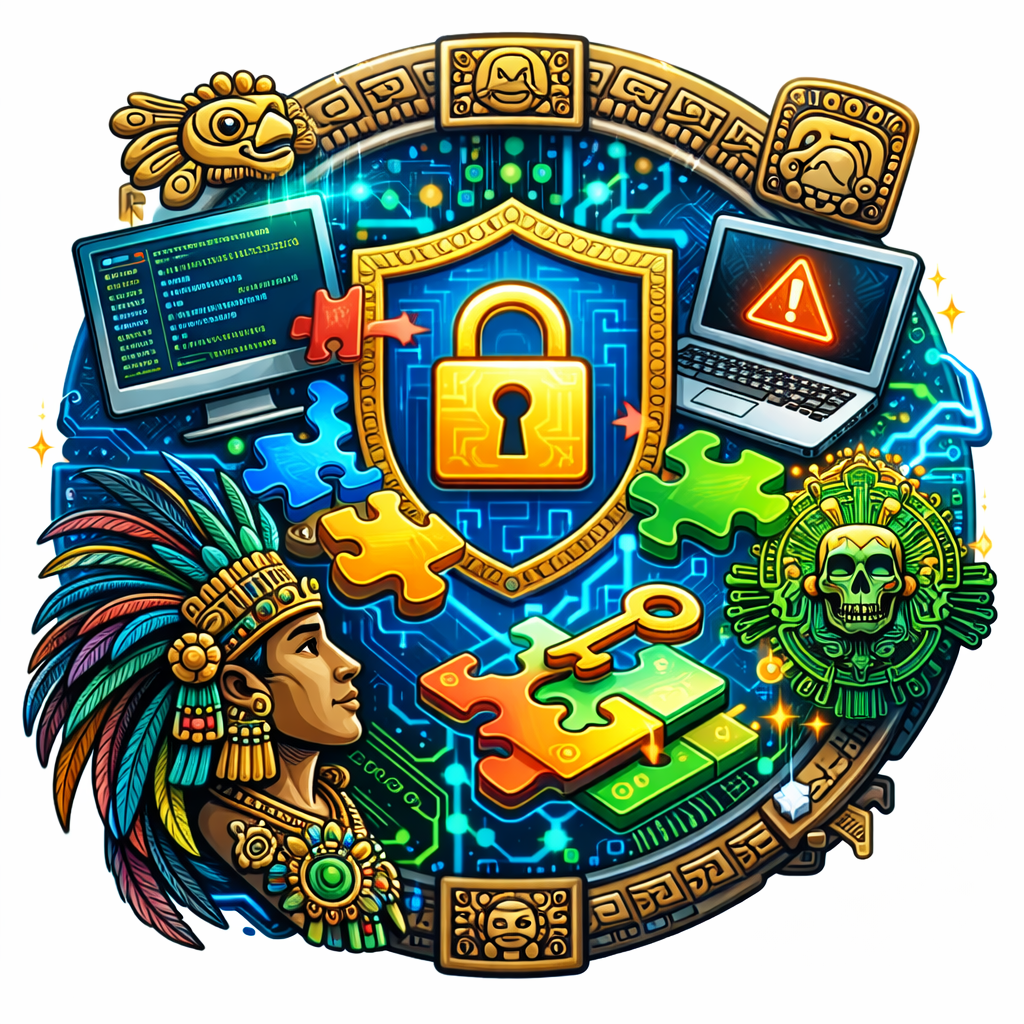

> En este laboratorio conectaremos una obra cinematográfica con fundamentos técnicos: **modelaremos cifrados**, **simularemos (de forma simplificada) una máquina tipo Enigma**, y **analizaremos críticamente** qué acierta y qué omite la película.  


## 0) Antes de empezar (formalidades)

### Entregables (obligatorios)
1. Este notebook **completado** (con celdas ejecutadas y resultados visibles).
2. Un **informe corto** (1–2 páginas) en PDF con:
   - (a) *Hallazgos técnicos*: qué implementaste y qué verificaste.
   - (b) *Crítica informada*: 2–3 afirmaciones sobre precisión histórica/técnica de la película, **respaldadas con referencias**.
   - (c) *Reflexión*: qué analogías ves con **seguridad/ciberseguridad** moderna (ej. modelos de amenaza, explotación de supuestos, automatización).

### Reglas académicas
- Puedes usar herramientas de apoyo (p. ej., **Gemini**) para redactar, explorar ideas y proponer código.
- **Debes citar** explícitamente:
  - qué partes fueron asistidas por IA,
  - qué prompts usaste (o un resumen razonable),
  - y cómo verificaste la corrección (tests, ejemplos, referencias).
- No copies/pegues soluciones completas sin entenderlas: se evaluará el **razonamiento** y la **validación**.

### Objetivos de aprendizaje
Al finalizar podrás:
- Explicar la idea de “espacio de llaves” y por qué **la complejidad importa**.
- Implementar y probar cifrados clásicos (Caesar, Vigenère) y una **Enigma simplificada**.
- Diseñar un ataque básico por “crib” (texto probable) y discutir supuestos.
- Relacionar el contexto histórico (Bletchley Park, Bombe) con conceptos modernos: automatización, ingeniería, y operación a escala.

### Tiempo sugerido
~2 horas (en clase) + ~2 horas (tarea).


## 1) Preparación del entorno (Colab)

Ejecuta esta celda. Si algo falla, documenta el error (captura o texto) y qué intentaste.



In [ ]:
# --- Imports básicos ---
import string
import itertools
from dataclasses import dataclass

ALPHABET = string.ascii_uppercase

def clean_text(s: str) -> str:
    """Deja solo letras A-Z y convierte a mayúsculas."""
    return ''.join([c for c in s.upper() if c in ALPHABET])

print("Listo. Alfabeto =", ALPHABET)

Listo. Alfabeto = ABCDEFGHIJKLMNOPQRSTUVWXYZ


## 2) Calentamiento: ¿Qué es “romper” un cifrado?

En la película, se sugiere que “romper Enigma” es *adivinar* o *tener suerte*. En realidad, el trabajo combina:
- matemáticas (modelos y reducción del espacio de búsqueda),
- ingeniería (máquinas y operación),
- lingüística/inteligencia (patrones del operador, “cribs”),
- y coordinación organizacional (procesos, turnos, control de calidad).

### Actividad 2.1 (Discusión breve)
Responde en 5–7 líneas:

**(a)** ¿Qué “supuesto” crees que explota un criptoanalista cuando usa un crib?  
**(b)** ¿Qué “supuesto” explota un atacante moderno al hacer phishing o credential stuffing?

> **Hint:** piensa en “regularidades” humanas/operacionales.

🟦 **Espacio para tu respuesta (escribe aquí):**  
- (a)  
- (b)  


## 3) Implementación 1: Cifrado César (baseline)

El cifrado César desplaza letras por un valor fijo `k`.  
Sirve como ejemplo para introducir:
- **llave** (k),
- **espacio de llaves** (26),
- **fuerza bruta** (probar todas).

### Tarea 3.1
Completa la función `caesar_encrypt` y `caesar_decrypt`.

📌 Requisito: incluye al menos **2 pruebas** (tests) con asserts.


In [ ]:
def caesar_encrypt(plaintext: str, k: int) -> str:
    # TODO: implementar (solo A-Z). Usa clean_text.
    # Pista: usa ALPHABET y (i + k) % 26
    pass

def caesar_decrypt(ciphertext: str, k: int) -> str:
    # TODO: implementar
    pass

# --- Tests mínimos (obligatorios) ---
# TODO: agrega asserts aquí


## 4) Implementación 2: Vigenère (para entender “mezcla”)

Vigenère usa una palabra clave (key) que define un desplazamiento distinto por posición.  
Es una transición útil antes de pensar en “rotación” de rotores.

### Tarea 4.1
Implementa `vigenere_encrypt` y `vigenere_decrypt`.

**Sugerencia Gemini (opcional):**  
Pídele a Gemini un pseudocódigo de Vigenère y luego **re-escríbelo** en tu estilo.  
Incluye en tu informe: prompt + verificación.

📌 Requisito: 2 tests con asserts, incluyendo un caso con espacios/puntuación en el texto original.


In [ ]:
def vigenere_encrypt(plaintext: str, key: str) -> str:
    # TODO: implementar (A-Z)
    pass

def vigenere_decrypt(ciphertext: str, key: str) -> str:
    # TODO: implementar (A-Z)
    pass

# --- Tests mínimos (obligatorios) ---
# TODO: agrega asserts aquí


## 5) Mini‑Enigma (simplificada) en Python

**Importante:** No vamos a reproducir Enigma militar real (con plugboard y procedimientos completos).  
Aquí construiremos un **modelo didáctico** con:
- 3 rotores (permutaciones),
- un reflector,
- y un mecanismo simple de “step”.

Esto nos permite discutir:
- por qué la composición de permutaciones crece rápido,
- y por qué los detalles operacionales cambian la seguridad.

### Concepto clave
Una Enigma simplificada puede verse como:

`C = R3(R2(R1( P(plaintext) )))` con pasos (rotaciones) entre letras, y un reflector que hace el proceso reversible.

### Tarea 5.1 (lectura + explicación)
En tus palabras: ¿por qué el reflector hace que en Enigma “encriptar” y “desencriptar” sea el mismo proceso? (4–6 líneas)

🟦 **Respuesta aquí:**  


In [ ]:
# --- Definiciones de rotores (didácticas) ---
# Nota: estas son permutaciones de A-Z (strings de 26 letras).
ROTOR_I   = "EKMFLGDQVZNTOWYHXUSPAIBRCJ"
ROTOR_II  = "AJDKSIRUXBLHWTMCQGZNPYFVOE"
ROTOR_III = "BDFHJLCPRTXVZNYEIWGAKMUSQO"
REFLECTOR_B = "YRUHQSLDPXNGOKMIEBFZCWVJAT"

def invert_wiring(wiring: str) -> str:
    inv = [''] * 26
    for i, c in enumerate(wiring):
        inv[ALPHABET.index(c)] = ALPHABET[i]
    return ''.join(inv)

INV_I   = invert_wiring(ROTOR_I)
INV_II  = invert_wiring(ROTOR_II)
INV_III = invert_wiring(ROTOR_III)

print("Rotores y reflector listos.")


### 5.2 Implementa la clase `MiniEnigma`

Definición mínima:
- Estado: `pos1`, `pos2`, `pos3` (0..25)
- Cada tecla:
  1) avanza el rotor 1 (y de forma simple, cascada cuando completa vuelta),
  2) pasa por rotor1->rotor2->rotor3,
  3) reflector,
  4) regreso inverso rotor3->rotor2->rotor1.

📌 Requisitos:
- Implementa `encipher(text)` (solo A-Z).
- Escribe tests:
  - `encipher(encipher(M)) == M` cuando reinicias al mismo estado inicial.
  - Un caso de regresión con un mensaje corto.

🧠 **Gemini permitido** para ayudarte a estructurar la clase, pero tú debes:
- explicar el “flujo” en un comentario,
- y validar con tests.

🟨 *Áreas vacías intencionales*: hay partes marcadas como TODO para que las completes.


In [ ]:
@dataclass
class MiniEnigma:
    r1: str = ROTOR_I
    r2: str = ROTOR_II
    r3: str = ROTOR_III
    reflector: str = REFLECTOR_B
    pos1: int = 0
    pos2: int = 0
    pos3: int = 0

    def step(self):
        """Avanza posiciones (modelo simple)."""
        # TODO: implementa stepping:
        # - pos1 siempre avanza
        # - si pos1 vuelve a 0, pos2 avanza
        # - si pos2 vuelve a 0, pos3 avanza
        pass

    def _rotor_fwd(self, c: str, wiring: str, pos: int) -> str:
        # TODO: aplica offset pos antes y después de mapear por wiring
        pass

    def _rotor_rev(self, c: str, inv_wiring: str, pos: int) -> str:
        # TODO: inverso del forward
        pass

    def _reflect(self, c: str) -> str:
        return self.reflector[ALPHABET.index(c)]

    def encipher_char(self, c: str) -> str:
        if c not in ALPHABET:
            return c
        self.step()

        # --- ida ---
        # TODO: pasa por rotor1, rotor2, rotor3 (forward)
        # --- reflector ---
        # TODO
        # --- regreso ---
        # TODO: pasa por inversos rotor3, rotor2, rotor1
        pass

    def encipher(self, text: str) -> str:
        text = clean_text(text)
        out = []
        for ch in text:
            out.append(self.encipher_char(ch))
        return ''.join(out)

# --- Tests mínimos (obligatorios) ---
# TODO: escribe tests aquí


## 6) Ataque guiado: fuerza bruta + crib (texto probable)

En la práctica histórica, **cribs** (pistas) reducían el espacio de búsqueda.
Aquí haremos algo educativo:
- asumiremos un **crib** corto (p. ej., “WEATHER”, “ATTACK”, “HEIL”, etc.),
- probaremos múltiples posiciones iniciales,
- y buscaremos coincidencias.

### Tarea 6.1
Implementa una función que, dado:
- un ciphertext,
- un crib,
- y un rango de posiciones iniciales,

retorne las configuraciones que producen plaintext con el crib como substring.

📌 Requisito:
- Debe correr en < 1 minuto para un ciphertext de ~100 letras en Colab.
- Debes comentar: ¿qué hace “viable” este ataque en el lab que NO necesariamente era trivial en la vida real?

🟦 *Espacio para tu respuesta (comentario o markdown):*  


In [ ]:
def search_with_crib(ciphertext: str, crib: str, max_pos: int = 5):
    """Busca configuraciones iniciales (pos1,pos2,pos3) en [0,max_pos) que producen un plaintext que contiene crib."""
    ciphertext = clean_text(ciphertext)
    crib = clean_text(crib)

    hits = []
    # TODO: iterar pos1,pos2,pos3; reiniciar máquina; descifrar; buscar crib
    return hits

# --- Datos de ejemplo (puedes cambiarlos) ---
M = "WE ATTACK AT DAWN MEET AT THE BRIDGE"
machine = MiniEnigma(pos1=0, pos2=0, pos3=0)
C = machine.encipher(M)

print("Ciphertext:", C)

# TODO: define un crib razonable y ejecuta la búsqueda


## 7) Conecta con la película: precisión técnica vs narrativa

La película *The Imitation Game* (2014) populariza conceptos, pero también dramatiza, simplifica u omite:
- contribuciones (p. ej., criptología polaca, equipos de Hut 6, Welchman),
- procesos operacionales (turnos, verificación, gestión),
- detalles técnicos (procedimientos reales, plugboard, redes distintas, etc.).

### Tarea 7.1 (análisis con evidencia)
Elige **2 escenas o afirmaciones** de la película y haz:
1) *Lo que la película muestra* (1–2 líneas).
2) *Qué dice la evidencia histórica/técnica* (3–5 líneas).
3) *Qué concepto técnico ilustra* (1–2 líneas), por ejemplo: reducción de búsqueda, ingeniería de confiabilidad, amenazas, sesgos humanos.

📌 Requisito: usa al menos **3 referencias** de la lista del final (o adicionales, bien citadas).

🟦 **Escribe aquí tu análisis:**  
- Caso 1:  
- Caso 2:  


## 8) Mini‑ensayo (para el PDF): de Bletchley Park a seguridad moderna

Redacta un mini‑ensayo (200–350 palabras) respondiendo:

**“¿Qué lecciones de Bletchley Park aplicarías hoy en un equipo de ciberseguridad o data/AI ops?”**

Incluye al menos 3 de estos ejes:
- automatización y operación a escala,
- control de calidad (evitar falsos positivos),
- gestión de secretos y compartimentación,
- sesgos y “human factors”,
- modelos de amenaza y supuestos,
- trade-offs entre privacidad, seguridad y misión.

🟦 **Borrador aquí (luego lo pegas en tu PDF):**  


## 9) Extensión opcional (bonus): visualiza permutaciones como grafo

En la semana hablaremos de grafos/knowledge graphs.  
Opcionalmente, representa un rotor como:
- un grafo dirigido de 26 nodos,
- aristas `A -> wiring[A]`.

### Tarea bonus
- Construye el grafo y calcula ciclos (cycle decomposition).
- Interpreta: ¿qué te dice la estructura de ciclos sobre la permutación?

> Puedes usar `networkx` (si está disponible) o implementarlo simple.

🟨 **Celda opcional (deja evidencia):**


In [ ]:
# BONUS (opcional)
# TODO: intenta importar networkx y construir el grafo.
# Si no, implementa ciclo-descomposición con listas.



# Sección 10 — Investigación de Criptosistemas Modernos

## Parte A — RSA (Criptografía Asimétrica)

### Objetivo

Entender:
* Cómo funciona el cifrado de clave pública
* Qué problema matemático lo protege
* Qué supuestos lo hacen seguro

### Preguntas de análisis (obligatorias)

* ¿Cuál es el problema matemático que protege RSA?
* ¿Qué pasaría si existiera un algoritmo eficiente para factorizar enteros grandes?
* ¿Por qué RSA requiere padding (OAEP) en la práctica?
* ¿Cómo cambia el modelo de amenaza respecto a Enigma?

## Parte B — AES (Simétrico Moderno)
Investigación conceptual

### Preguntas de análisis (obligatorias)
Responde:
* ¿Qué significa que AES sea una red de sustitución-permutación (SPN)?
* ¿Qué protege realmente a AES: tamaño de clave o estructura?
* ¿Qué tipo de ataque NO rompe AES pero sí rompe implementaciones?

## Referencias (mínimo recomendado para este lab)

> Nota: Usa estilo IEEE/APA en tu PDF. Aquí te dejo referencias con URLs para consulta.

1. A. M. Turing, “On Computable Numbers, with an Application to the Entscheidungsproblem,” *Proceedings of the London Mathematical Society*, 1937. DOI: 10.1112/plms/s2-42.1.230  
   - URL: https://academic.oup.com/plms/article-abstract/s2-42/1/230/1491926  
   - Copia PDF (universidad): https://www.cs.virginia.edu/~robins/Turing_Paper_1936.pdf

2. A. M. Turing, “Computing Machinery and Intelligence,” *Mind*, vol. 59, no. 236, pp. 433–460, 1950. DOI: 10.1093/mind/LIX.236.433  
   - URL: https://academic.oup.com/mind/article-abstract/LIX/236/433/986238  
   - Copia PDF (curso): https://courses.cs.umbc.edu/471/papers/turing.pdf

3. Bletchley Park Trust, “6 facts about the Bombe,” (recurso histórico).  
   - URL: https://www.bletchleypark.org.uk/our-story/6-facts-about-the-bombe/

4. The National Museum of Computing (TNMOC), “The Turing‑Welchman Bombe,” (recurso histórico).  
   - URL: https://www.tnmoc.org/bombe

5. Bletchley Park Trust, “Enigmas of Bletchley Park,” (historia de modelos Enigma).  
   - URL: https://www.bletchleypark.org.uk/our-story/enigmas-of-bletchley-park/

6. P. Ross, “The Imitation Game as a Method for Testing Interactional Expertise,” *International Journal of Communication*, 2023.  
   - URL (PDF): https://ijoc.org/index.php/ijoc/article/viewFile/19677/4269

7. (Libro recomendado) G. Welchman, *The Hut Six Story: Breaking the Enigma Codes*, 1982/1997 (ediciones varias).  
   - Ficha (ISBN): https://www.amazon.com/Hut-Six-Story-Breaking-Enigma/dp/0947712348

### Referencias adicionales (si deseas profundizar)
- Bletchley Park (sitio principal / materiales): https://www.bletchleypark.org.uk/  
- Historia resumida de la “Cryptanalysis of the Enigma” (útil para navegación, pero cítala con cuidado): https://en.wikipedia.org/wiki/Cryptanalysis_of_the_Enigma


---
## Checklist antes de entregar
- [ ] Todas las celdas ejecutadas sin errores (o con errores documentados).
- [ ] Implementaciones completas: César, Vigenère, Mini‑Enigma.
- [ ] Tests con `assert` presentes y pasando.
- [ ] Búsqueda con crib implementada y discutida.
- [ ] Sección de crítica de la película con evidencia (referencias).
- [ ] PDF (1–2 páginas) con citas formales + declaración de uso de IA.

**Nombre del estudiante:** ____________________  
**Fecha:** ____________________
